# Imports

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from config import paths
import os

# Connecting and getting data

In [84]:
folder_paths = paths.get_paths()
folder_path = folder_paths["data"]
file_path = os.path.join(folder_path, 'combine_ML3.csv')
df = pd.read_csv(file_path)

In [85]:
print(df)

      Parameter_name  Parameter_value Regression_model  \
0     ball_pivotings             0.45    Random_forest   
1     ball_pivotings             0.50          XGBoost   
2             alphas             3.00          XGBoost   
3     ball_pivotings             0.35    Random_forest   
4    marching_cubess             1.40    Random_forest   
..               ...              ...              ...   
347           alphas             0.80    Random_forest   
348           alphas             1.75    Random_forest   
349  marching_cubess             0.80    Random_forest   
350           alphas             0.30    Random_forest   
351  marching_cubess             8.00    Random_forest   

     RMSE_score_calibration  RMSE_score_validation  R2_score_calibration  \
0              94656.287968           1.558343e+06              0.923131   
1             285237.383518           1.045519e+06              0.845580   
2              44209.056374           1.605694e+06              0.964002   

# Plots

## R2 for each parameter

0.2 1


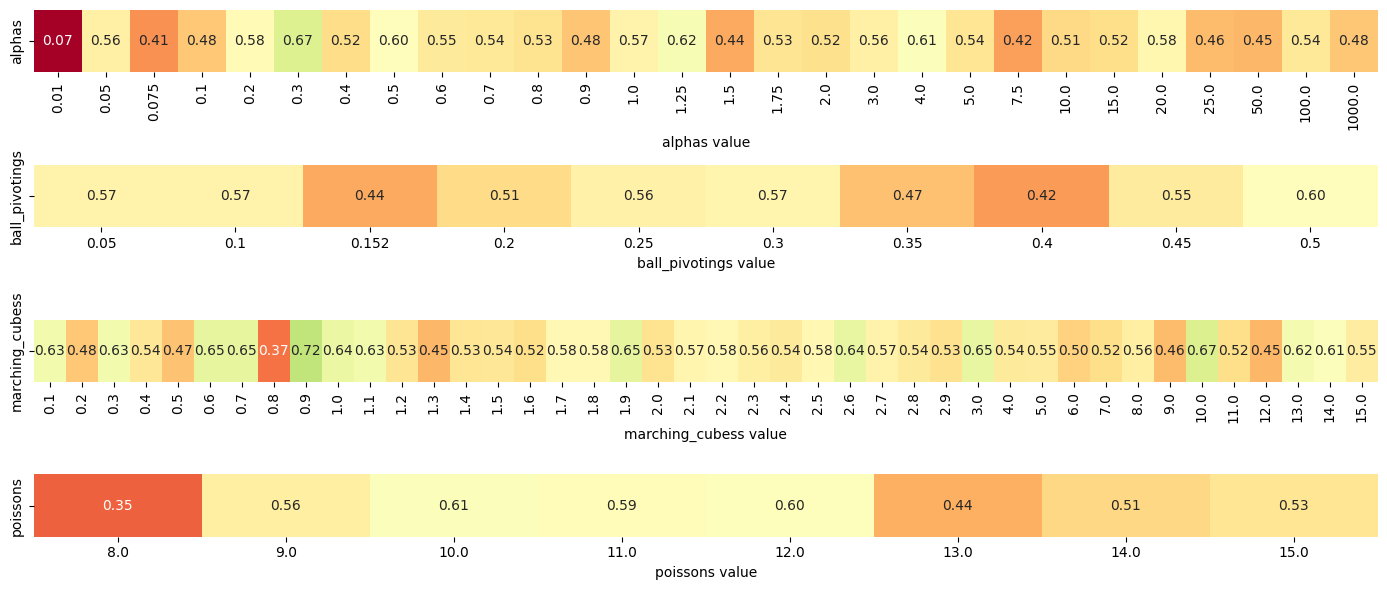

In [96]:
df_model = df[df['Regression_model'] == 'XGBoost']
df_current = df_model[df_model['by_year'] == False]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 6))

# Get the minimum and maximum values from all data
vmin = 0.2
vmax = 1
print(vmin, vmax)


# Plotting heatmaps
for i, (param, group) in enumerate(df_current.groupby('Parameter_name')):
    pivot_table = group.pivot_table(index='Parameter_name', columns='Parameter_value', values='R2_score_validation')
    sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt='.2f', cbar=False, ax=axes[i], vmin=vmin, vmax=vmax)
    
    axes[i].set_ylabel("")
    axes[i].set_xlabel(param + ' value')
    
plt.tight_layout()
plt.show()